Predict how late flights will be using 2008 data. A flight is late if it is more than 30 minutes late.

Data Source: http://stat-computing.org/dataexpo/2009/the-data.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
air_data = pd.read_csv("2008.csv")
air_data.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [4]:
air_data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
# need to create dummy variables for object column data (beware of dummy variable trap)
air_data.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [6]:
air_data.shape

(7009728, 29)

In [7]:
# find difference between actual and scheduled flight times 
air_data["TimeDiff"] = (air_data["CRSArrTime"]-air_data["CRSDepTime"])-(air_data["ArrTime"] - air_data["DepTime"])

In [8]:
# create column with binary values, difference between schedule and actual is <=-30 indicates late
air_data["Late"] = np.where(air_data["TimeDiff"] <= -30, 1,0)

In [9]:
# check for missing values in df
air_data.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
TimeDiff              151649
Late                       0
dtype: int64

In [10]:
# drop irrelevant columns first
irr_cols = ["TailNum","CancellationCode"]

for col in irr_cols:
    air_data = air_data.drop(col,1)

In [11]:
# fillna values for specific columns (extra step)
delay_cols = ["CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","TaxiIn","TaxiOut"]
air_data[delay_cols] = air_data[delay_cols].fillna(value=0)

In [12]:
# drop the rest of the NaN values
air_data = air_data.dropna(how="any")

In [13]:
air_data.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
TimeDiff             0
Late                 0
dtype: int64

In [14]:
# lost 154,699 data values ... 6,855,029 data values remain
air_data.shape

(6855029, 29)

In [15]:
# convert categorical values to numerical (factorize)
cate_col = ["UniqueCarrier","Origin","Dest"]

for col in cate_col:
    air_data[col] = pd.factorize(air_data[col])[0]

In [16]:
# check for features most correlated with dependent features (column "Late")
corrmat = air_data.corr()

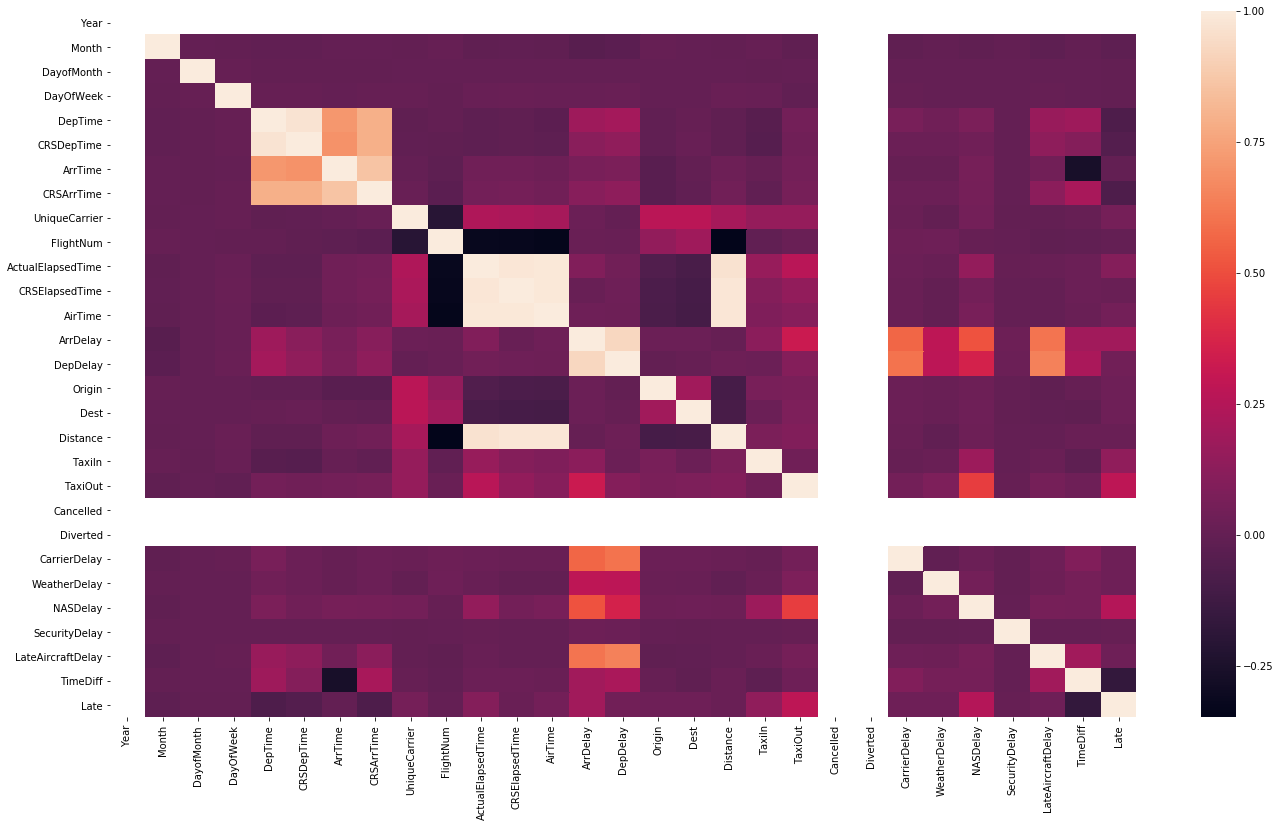

In [17]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (23,13)
sns.heatmap(corrmat)
plt.show()

In [18]:
# drop columns Year, Cancelled, and Diverted (no relevent info contributed)
cols_to_drop = ["Year","Cancelled","Diverted"]

for col in cols_to_drop:
    air_data = air_data.drop(col,1)

In [19]:
corrmat = air_data.corr()

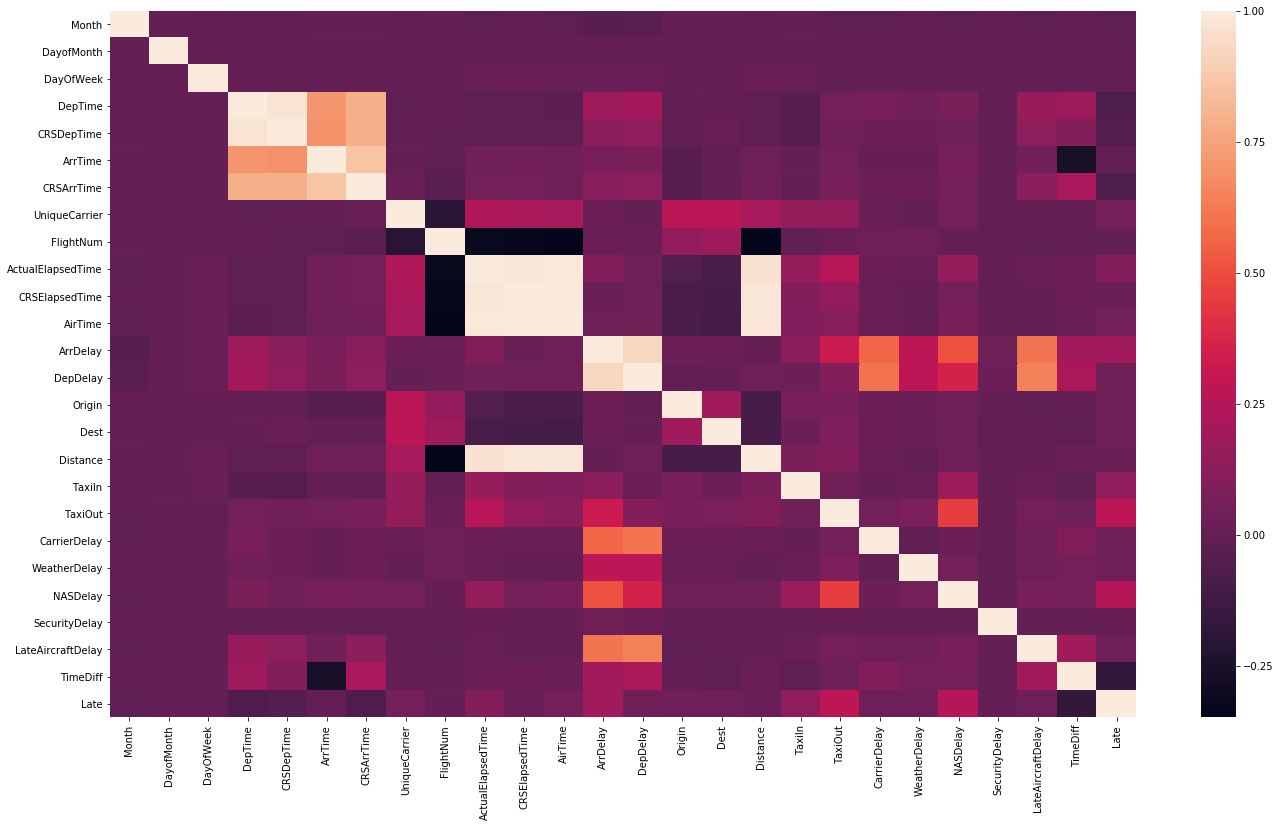

In [20]:
sns.heatmap(corrmat)
plt.show()

In [21]:
air_data.shape

(6855029, 26)

## Classifying Late Flights

Going to try using Recursive Feature Elimination (RFE) to select features by recursively considering smaller and smaller sets of features (selection criteria based on coefficient attribute and feature importance attribute). 

In [22]:
X = air_data.iloc[:,0:24]
y = air_data.iloc[:,25]

In [23]:
X.head(3)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,0,335,128.0,...,0,0,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0
1,1,3,4,754.0,735,1002.0,1000,0,3231,128.0,...,0,0,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0
2,1,3,4,628.0,620,804.0,750,0,448,96.0,...,1,1,515,3.0,17.0,0.0,0.0,0.0,0.0,0.0


In [24]:
y.head(3)

0    0
1    0
2    1
Name: Late, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
ypred_logreg = logreg.predict(X_test)

In [28]:
print("Accuracy of logistic regression classifier on test set: ",logreg.score(X_test,y_test))

Accuracy of logistic regression classifier on test set:  0.9905799099347486


Wow that's a pretty accurate score for our model. However, just by judging the by the amount of features we have, it is safe to assume that the score reflects overfitting in the model rather than accuracy. Lets apply some feature reduction techniques to try and remove some of the noise in the data.

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.decomposition import PCA

# choose minimum number of components so that 95% of variance is retained
pca = PCA(0.95)

In [33]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [35]:
# refit logistic regression model
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
ypred_logreg2 = logreg.predict(X_test)

In [37]:
print("Accuracy of logistic regression classifier on test set: ",logreg.score(X_test,y_test))

Accuracy of logistic regression classifier on test set:  0.8696701546163912


Much better. The model is still fairly accurate, but now the model is not trying to fit all the noise that was present in the training data. We had to sacrifice some interpretability in our features, but the goal for this project was just to create a model that could accurately predict whether a flight will arrive 30min late or not so feature interpretability is not necessary. 

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test,ypred_logreg2)

In [40]:
print(confusion_matrix)

[[1165681   10728]
 [ 167955   26642]]


Correct Predictions: 1192323 / 1371006 (86.97%)

Incorrect Predictions: 178683 / 1371006 (13.03%) 